# Graduate Rotational Internship Program
# The Sparks Foundation ( Data Science & Business Analytics Tasks )

## Task 3 : Exploratory Data Analysis - Retail

**Objective : In this task as a business manager, try to find out the weak areas where you can
              work to make more profit.**

# Author : Ritik Kumar

In [8]:
## Imported Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('SampleSuperstore.csv')

In [3]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
## Missing Values
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Q1 Frequency of different Category ?

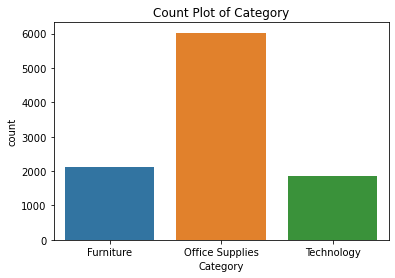

In [9]:
sns.countplot(data['Category'])
plt.title('Count Plot of Category')
plt.show()

## Q2 Which Category Make the More Profit and Sales?

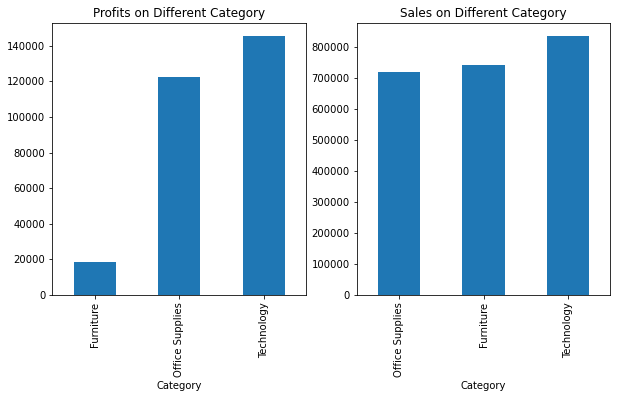

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.groupby('Category')['Profit'].sum().sort_values().plot.bar()
plt.title('Profits on Different Category')

plt.subplot(1,2,2)
data.groupby('Category')['Sales'].sum().sort_values().plot.bar()
plt.title('Sales on Different Category')

plt.show()

## Q3 Which SubCategory of Furniture Makes The More or Least Profit?

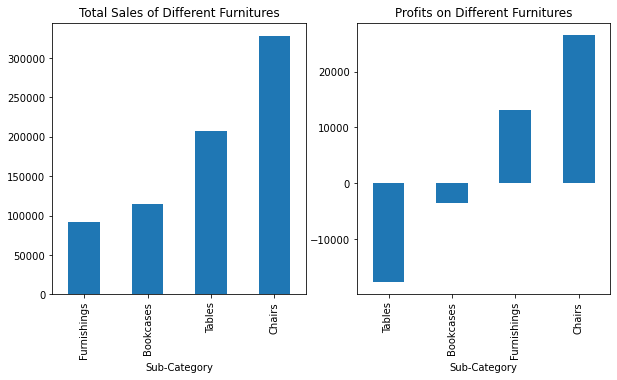

In [11]:
df = data[data['Category'] == 'Furniture' ]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.groupby('Sub-Category')['Sales'].sum().sort_values().plot.bar()
plt.title('Total Sales of Different Furnitures')

plt.subplot(1,2,2)
df.groupby('Sub-Category')['Profit'].sum().sort_values().plot.bar()
plt.title('Profits on Different Furnitures')
plt.show()

## Q4 : Which Ship Mode  and Region Makes the More and Least Profit ?

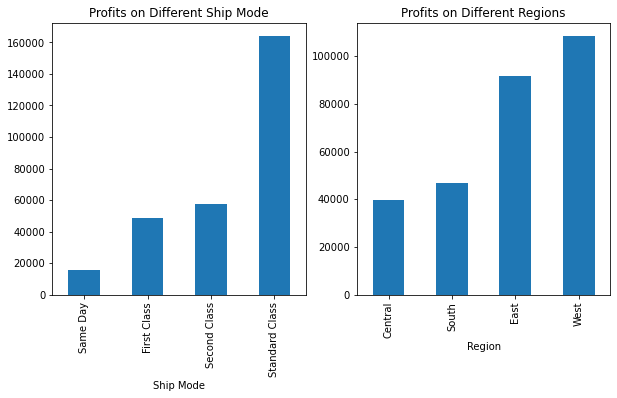

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.groupby('Ship Mode')['Profit'].sum().sort_values().plot.bar()
plt.title('Profits on Different Ship Mode')

plt.subplot(1,2,2)
data.groupby('Region')['Profit'].sum().sort_values().plot.bar()
plt.title('Profits on Different Regions')

plt.show()

## Q5 : Which Ship Mode  and Region Makes the More and Least Sales ?

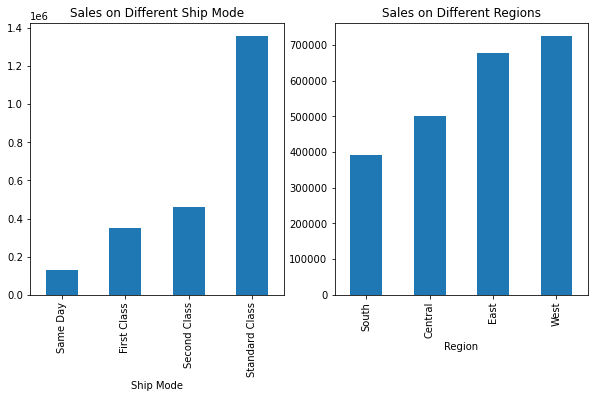

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
data.groupby('Ship Mode')['Sales'].sum().sort_values().plot.bar()
plt.title('Sales on Different Ship Mode')

plt.subplot(1,2,2)
data.groupby('Region')['Sales'].sum().sort_values().plot.bar()
plt.title('Sales on Different Regions')

plt.show()

## Q6 Which Category Make More Sales and Profit on West Region?

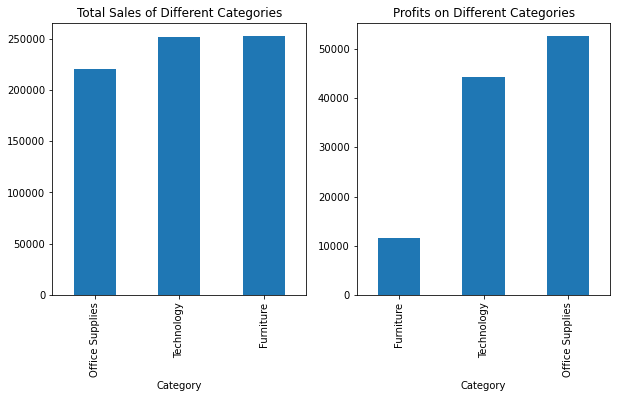

In [14]:
df = data[data['Region'] == 'West']

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.groupby('Category')['Sales'].sum().sort_values().plot.bar()
plt.title('Total Sales of Different Categories')

plt.subplot(1,2,2)
df.groupby('Category')['Profit'].sum().sort_values().plot.bar()
plt.title('Profits on Different Categories')

plt.show()

## Q7 What is the Profit of Different Region on Different Ship Modes.

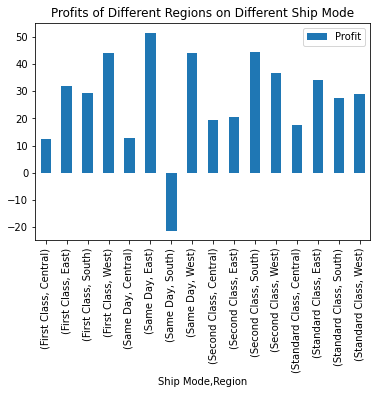

In [16]:
table = pd.pivot_table(data,index=['Ship Mode','Region'],values=['Profit'], aggfunc=np.mean).plot.bar()
plt.title('Profits of Different Regions on Different Ship Mode')
plt.show()

## Q8 Profits of Different State?

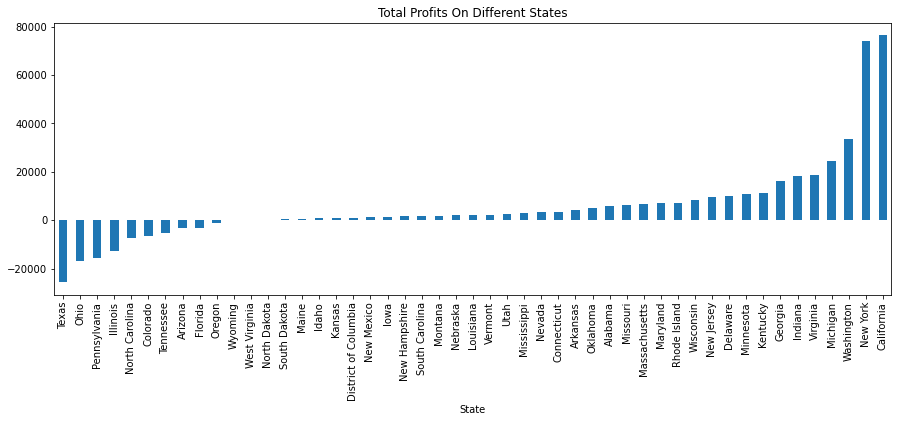

In [17]:
plt.figure(figsize=(15,5))
data.groupby('State')['Profit'].sum().sort_values().plot.bar()
plt.title('Total Profits On Different States')
plt.show()

## Q9 Which Segment has more Sales and Make More Profits?

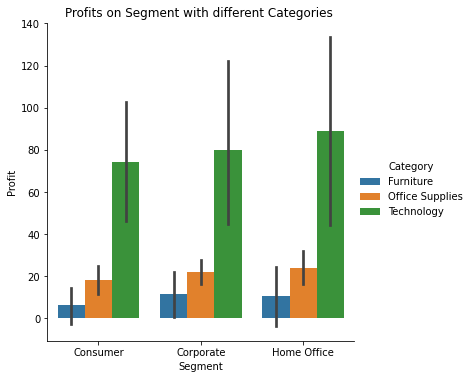

In [18]:
sns.catplot(x="Segment", y="Profit", kind="bar",hue='Category', data=data)
plt.title('Profits on Segment with different Categories ')
plt.show()

## Q10 Pivot Table To Display Average Profit of All The Categories ?

In [19]:
table = pd.pivot_table(data,index=['Ship Mode','Region','Segment'],columns=['Category'],values=['Profit'],aggfunc=np.mean)
table

Profit                             
Category                            Furniture Office Supplies   Technology
Ship Mode      Region  Segment                                            
First Class    Central Consumer     16.959019      -10.583406    45.284538
                       Corporate   -26.956532       -9.367002    68.160852
                       Home Office -53.184654       76.428216    63.043218
               East    Consumer      3.401687       20.879461    13.428158
                       Corporate    23.603781       21.049878    28.028811
                       Home Office  54.384057       31.004707   287.442262
               South   Consumer     54.998909       27.321551    35.475923
                       Corporate     9.908690       20.837054   129.876738
                       Home Office -32.270633      -13.073137    38.454775
               West    Consumer      1.520396       23.427744   190.625289
                       Corporate    16.159695       42.307376    92.037426
                       Home Office  12.119204        8.132795    70.115300
Same Day       Central Consumer     -9.874674        9.553643    44.320986
                       Corporate     2.735400       -5.811350          NaN
                       Home Office   4.312100        2.294794   178.017875
               East    Consumer    -26.467331       27.231431   176.512276
                       Corporate    59.321125       13.378709   228.337009
                       Home Office -27.131029       21.723608   107.385467
               South   Consumer     29.619425        8.125369    35.174908
                       Corporate   -66.351067       28.384340 -1857.001500
                       Home Office  29.977400       51.971477    59.150950
               West    Consumer     23.798032       22.303703   147.956213
                       Corporate    -1.086333       32.553544   298.915150
                       Home Office  30.753292       24.247791    95.337525
Second Class   Central Consumer    -50.708758       11.616810    44.804967
                       Corporate    40.639052       25.734444    10.709194
                       Home Office   0.948162       43.471880    97.138380
               East    Consumer     14.398803       18.226238    42.403060
                       Corporate   -15.116274       21.581988    47.766580
                       Home Office -12.879663       26.500777    60.560137
               South   Consumer     17.989137        0.773506   195.075665
                       Corporate    26.382976       31.604123   206.201216
                       Home Office  52.839071       37.563095    63.248227
               West    Consumer     20.459751       26.116337    89.590053
                       Corporate    21.750738       27.298871    37.428817
                       Home Office  74.816052       56.356050    42.761385
Standard Class Central Consumer    -11.830449        3.103568    46.291815
                       Corporate    20.178026       -5.586910   229.784343
                       Home Office -10.673890        8.540226    83.848214
               East    Consumer      8.004691       22.453700    91.204166
                       Corporate    -2.953751       29.145287    53.193008
                       Home Office   5.653032       26.924758   178.994162
               South   Consumer     22.087447       23.465418    73.464371
                       Corporate     8.268838       23.628549    79.972612
                       Home Office  32.213655       13.153718   -17.955350
               West    Consumer      9.834175       26.073314    63.537112
                       Corporate    20.859958       32.630470    54.109840
                       Home Office  13.079156       21.957554    19.164949

## Conclusion : 

In [ ]:
1. The Quantity of Office Supplis is more.
2  Technology selling is more than others and make more profits.
3. Furniture selling is also good but profit is so low.
4. selling of Tables is high , but it is in loss.
5. West Regions makes the more profit whereas central Region makes the least profit.
6. Sales or Profits on Ship Mode is directly Proportional.
7. On the West Region Office Supplies sales is least but it makes hight profit than other categories.
8. Same Day (Ship Mode) on East Region Makes more profit whereas, Same Day (Ship Mode) on South Region is in loss.
9. New York and California are the two State with very high profits whereas, Texas is in loss.
10. Technology product makes profit on all the Different Segments.

## Thank You